In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Try getting a better score, re-evaluated the available data and decided to try: 
# Predict: Total unit sales (total sum by year and by item_nbr on 12/24)
# Convert store_nbr to a count of stores that sold an item_nbr
# Convert onpromotion to a sum of stores that had item on promotion

In [3]:
# Read the csv file into a pandas DataFrame
data2014 = pd.read_csv('Resources/navidad_2014.csv')
data2015 = pd.read_csv('Resources/navidad_2015.csv')
data2016 = pd.read_csv('Resources/navidad_2016.csv')
data2014_26 = pd.read_csv('Resources/navidad_2014_12_26.csv')
data2015_26 = pd.read_csv('Resources/navidad_2015_12_26.csv')
data2016_26 = pd.read_csv('Resources/navidad_2016_12_26.csv')
data_df = data2014.append(data2015, ignore_index=True)
data_df = data_df.append(data2016, ignore_index=True)
data_df = data_df.append(data2014_26, ignore_index=True)
data_df = data_df.append(data2015_26, ignore_index=True)
data_df = data_df.append(data2016_26, ignore_index=True)

In [4]:
data_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,38069001,2014-12-24,1,103520,3.0,False
1,38069002,2014-12-24,1,103665,6.0,False
2,38069003,2014-12-24,1,105574,1.0,False
3,38069004,2014-12-24,1,105575,14.0,False
4,38069005,2014-12-24,1,105857,1.0,False


In [5]:
data_df.dtypes

id               int64
date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion       bool
dtype: object

In [6]:
from datetime import date
import datetime
# all NA values were already dropped with initial clean/sectioning by year
#data_df.isna().sum()
# convert the 'Date' column to datetime format 
data_df['date']= pd.to_datetime(data_df['date'])
data_df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion              bool
dtype: object

In [7]:
# extract the year from the date since that is the only difference in date
#make copy of df
data_df2 = data_df.copy()
data_df2['year'] = pd.DatetimeIndex(data_df2['date']).year
data_df2['day'] = pd.DatetimeIndex(data_df2['date']).day
data_df2.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,day
0,38069001,2014-12-24,1,103520,3.0,False,2014,24
1,38069002,2014-12-24,1,103665,6.0,False,2014,24
2,38069003,2014-12-24,1,105574,1.0,False,2014,24
3,38069004,2014-12-24,1,105575,14.0,False,2014,24
4,38069005,2014-12-24,1,105857,1.0,False,2014,24


In [8]:
data_df2.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion              bool
year                    int64
day                     int64
dtype: object

In [9]:
# double checking na values
data_df2.isna().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
year           0
day            0
dtype: int64

In [10]:
#drop date column
data_df2 = data_df2.drop(['date'], axis = 1)

In [11]:
#set index to id
data_df2.set_index('id', inplace=True, drop=True)
data_df2.head()

,store_nbr,item_nbr,unit_sales,onpromotion,year,day
id,,,,,,
38069001,1,103520,3.0,False,2014,24
38069002,1,103665,6.0,False,2014,24
38069003,1,105574,1.0,False,2014,24
38069004,1,105575,14.0,False,2014,24
38069005,1,105857,1.0,False,2014,24


In [12]:
data_df2["onpromotion"] = data_df2["onpromotion"].astype(int)

In [13]:
data_df_count = data_df2.groupby(['item_nbr', 'year', 'day']).count() 
data_df_count = data_df_count.reset_index()
data_df_count.head()

,item_nbr,year,day,store_nbr,unit_sales,onpromotion
0,99197,2015,24,2,2,2
1,99197,2015,26,1,1,1
2,99197,2016,24,19,19,19
3,99197,2016,26,15,15,15
4,103501,2014,24,21,21,21


In [14]:
data_df3 = data_df2.copy()
data_df3 = data_df3.groupby(['item_nbr', 'year', 'day']).sum() 
data_df3.head()

store_nbr  unit_sales  onpromotion
item_nbr year day                                    
99197    2015 24          71         4.0            0
              26          25         2.0            0
         2016 24         619        56.0            0
              26         514        37.0            0
103501   2014 24         523        93.0            0

In [15]:
data_df4 = data_df3.reset_index()
data_df4.head(10)

,item_nbr,year,day,store_nbr,unit_sales,onpromotion
0,99197,2015,24,71,4.0,0
1,99197,2015,26,25,2.0,0
2,99197,2016,24,619,56.0,0
3,99197,2016,26,514,37.0,0
4,103501,2014,24,523,93.0,0
5,103501,2014,26,589,108.0,0
6,103501,2015,24,635,70.0,0
7,103501,2015,26,565,121.0,0
8,103501,2016,24,647,103.0,0
9,103501,2016,26,681,148.0,0


In [16]:
data_df4 = data_df4.rename(columns={"onpromotion": "num_stores_promoted"})

In [17]:
data_df4 = data_df4.drop(['store_nbr'], axis=1)
data_df4['num_stores_sold'] = data_df_count['store_nbr']
data_df4.head(10)

,item_nbr,year,day,unit_sales,num_stores_promoted,num_stores_sold
0,99197,2015,24,4.0,0,2
1,99197,2015,26,2.0,0,1
2,99197,2016,24,56.0,0,19
3,99197,2016,26,37.0,0,15
4,103501,2014,24,93.0,0,21
5,103501,2014,26,108.0,0,23
6,103501,2015,24,70.0,0,24
7,103501,2015,26,121.0,0,23
8,103501,2016,24,103.0,0,26
9,103501,2016,26,148.0,0,27


In [18]:
data_df4.isna().sum()

item_nbr               0
year                   0
day                    0
unit_sales             0
num_stores_promoted    0
num_stores_sold        0
dtype: int64

In [19]:
################################
######### BEGIN MODELS #########
################################

In [20]:
data_df2 = data_df4.copy()
# set up data 
X = data_df2.drop(['unit_sales'], axis=1)
y = data_df2['unit_sales']

In [21]:
# split up data to train and test sets 
XScaled =  X
yScaled =  y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(XScaled, yScaled, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [23]:
# Basic Linear Regression
lr = LinearRegression() #instantiate the model with desired parameter values
lr.fit(X_train, y_train) # fit the model to the training data
y_pred = lr.predict(X_test) #apply the model to test data 

print("LINEAR REGRESSION MODEL")
print("RMSE Score:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print("RSquare Score:")
print(metrics.r2_score(y_test, y_pred)) # r-square


# # plot predicted vs actual and predicted vs residuals
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# sns.jointplot(y_pred, y_test) 
# sns.jointplot(y_pred, (y_test - y_pred))    

LINEAR REGRESSION MODEL
RMSE Score:
430.3544479455433
RSquare Score:
0.1919035353826184


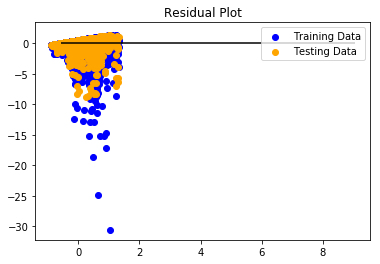

In [24]:
# Using Linear Regession with Scaled Data 
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [25]:
y_pred_scaled = model.predict(X_test_scaled)
print("LINEAR REGRESSION MODEL WITH SCALED DATA")
print("RMSE Score:")
print(np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred_scaled))) # rmse
print("RSquare Score:")
print(metrics.r2_score(y_test_scaled, y_pred_scaled)) # r-square

LINEAR REGRESSION MODEL WITH SCALED DATA
RMSE Score:
0.7836763143842802
RSquare Score:
0.19190353538491678


In [26]:
# Ridge Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L2 regularization:
# minmize ||y - Xw||^2_2 + alpha * ||w||^2_2

from sklearn.linear_model import Ridge
rr = Ridge(alpha=1.0)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)  

print("RIDGE REGRESSION MODEL")
print("RMSE Score:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print("RSquare Score:")
print(metrics.r2_score(y_test, y_pred)) # r-square

RIDGE REGRESSION MODEL
RMSE Score:
430.3543427061293
RSquare Score:
0.19190393060840694


In [27]:
# Lasso Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L2 regularization:
# minimize (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

from sklearn.linear_model import Lasso
lr = Lasso(alpha=1.0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("LASSO REGRESSION MODEL")
print("RMSE Score:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print("RSquare Score:")
print(metrics.r2_score(y_test, y_pred)) # r-square

LASSO REGRESSION MODEL
RMSE Score:
430.32364589344365
RSquare Score:
0.19201920812053108


In [28]:
# ElasticNet Regression
# https://scikit-learn.org/stable/modules/linear_model.html
# Least squares with L1 and L2 regularization:
# minimize 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)  


print("ELASTICNET REGRESSION MODEL")
print("RMSE Score:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
print("RSquare Score:")
print(metrics.r2_score(y_test, y_pred)) # r-square

ELASTICNET REGRESSION MODEL
RMSE Score:
430.22037793957867
RSquare Score:
0.192406955864609
